In [1]:
from app import *

/home/weiqf/miniconda3/envs/instantmesh/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Seed set to 0


Loading diffusion model ...


/home/weiqf/miniconda3/envs/instantmesh/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading pipeline components...:  62%|██████▎   | 5/8 [00:01<00:00,  4.79it/s]The config attributes {'dropout': 0.0, 'reverse_transformer_layers_per_block': None} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.
Some weights of the model checkpoint were not used when initializing UNet2DConditionModel: 
 ['alphas_cumprod, alphas_cumprod_prev, betas, sqrt_alphas_cumprod, sqrt_one_minus_alphas_cumprod, sqrt_recip_alphas_cumprod, sqrt_recipm1_alphas_cumprod']
Loading pipeline components...: 100%|██████████| 8/8 [00:33<00:00,  4.22s/it]


Loading reconstruction model ...


Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vitb16 and are newly initialized: ['encoder.layer.4.adaLN_modulation.1.bias', 'encoder.layer.8.adaLN_modulation.1.bias', 'encoder.layer.2.adaLN_modulation.1.weight', 'encoder.layer.6.adaLN_modulation.1.weight', 'encoder.layer.0.adaLN_modulation.1.bias', 'encoder.layer.8.adaLN_modulation.1.weight', 'encoder.layer.6.adaLN_modulation.1.bias', 'encoder.layer.0.adaLN_modulation.1.weight', 'encoder.layer.11.adaLN_modulation.1.bias', 'encoder.layer.1.adaLN_modulation.1.weight', 'encoder.layer.11.adaLN_modulation.1.weight', 'encoder.layer.7.adaLN_modulation.1.bias', 'encoder.layer.9.adaLN_modulation.1.bias', 'encoder.layer.3.adaLN_modulation.1.bias', 'encoder.layer.9.adaLN_modulation.1.weight', 'encoder.layer.3.adaLN_modulation.1.weight', 'encoder.layer.7.adaLN_modulation.1.weight', 'encoder.layer.10.adaLN_modulation.1.bias', 'encoder.layer.10.adaLN_modulation.1.weight', 'encoder.layer.1.adaLN_modulation.1

Loading Finished!


/nas/Main/Hutzper/InstantMesh/app.py:324: GradioUnusedKwargWarning: You have unused kwarg parameters in Image, please remove them: {'sources': 'upload'}
  input_image = gr.Image(
/nas/Main/Hutzper/InstantMesh/app.py:333: GradioUnusedKwargWarning: You have unused kwarg parameters in Image, please remove them: {'sources': 'upload'}
  input_image2 = gr.Image(


Running on local URL:  http://0.0.0.0:43839

To create a public link, set `share=True` in `launch()`.


In [2]:
state_dict = torch.load(
    "/nas/Main/Hutzper/InstantMesh/ckpts/step=00062000-v1.ckpt", map_location="cpu"
)

IMPORTANT: You are using gradio version 3.41.2, however version 4.29.0 is available, please upgrade.
--------


In [4]:
keys_to_remove = {
    "betas",
    "alphas_cumprod",
    "alphas_cumprod_prev",
    "sqrt_alphas_cumprod",
    "sqrt_one_minus_alphas_cumprod",
    "sqrt_recip_alphas_cumprod",
    "sqrt_recipm1_alphas_cumprod",
}

updated_state_dict = {
    key.replace("unet.unet.", ""): value
    for key, value in state_dict["state_dict"].items()
    if not any(k in key for k in keys_to_remove)
}

pipeline.unet.load_state_dict(updated_state_dict, strict=True)



<All keys matched successfully>

Seed set to 42


(292, 587)


100%|██████████| 75/75 [00:07<00:00,  9.93it/s]
/nas/Main/Hutzper/InstantMesh/app.py:185: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  show_image = torch.from_numpy(show_image)  # (960, 640, 3)


/tmp/tmpd834qxke.obj


100%|██████████| 6/6 [00:30<00:00,  5.08s/it]


Video saved to /tmp/tmpd834qxke.mp4
Mesh saved to /tmp/tmpd834qxke.obj


Seed set to 42


(244, 488)


100%|██████████| 75/75 [00:09<00:00,  8.20it/s]


/tmp/tmp39vhzzbq.obj


100%|██████████| 6/6 [00:06<00:00,  1.15s/it]


Video saved to /tmp/tmp39vhzzbq.mp4
Mesh saved to /tmp/tmp39vhzzbq.obj


Seed set to 42


(170, 340)


100%|██████████| 75/75 [00:08<00:00,  9.09it/s]


/tmp/tmp9aiybjmh.obj


100%|██████████| 6/6 [00:06<00:00,  1.10s/it]


Video saved to /tmp/tmp9aiybjmh.mp4
Mesh saved to /tmp/tmp9aiybjmh.obj


In [2]:
image = Image.open('test_obj/000.png')
processed_image = preprocess(image, True)
mv_images, mv_show_images = generate_mvs(processed_image, 70, 42)


Seed set to 42


Converted RGBA to RGB
Image size: (471, 471)


100%|██████████| 70/70 [00:06<00:00, 10.22it/s]
/nas/Main/Hutzper/InstantMesh/app.py:169: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  show_image = torch.from_numpy(show_image)  # (960, 640, 3)


In [12]:
mv_show_images.size
#mv_show_images

(960, 640)

(0, 0)
(320, 0)
(640, 0)
(0, 320)
(320, 320)
(640, 320)


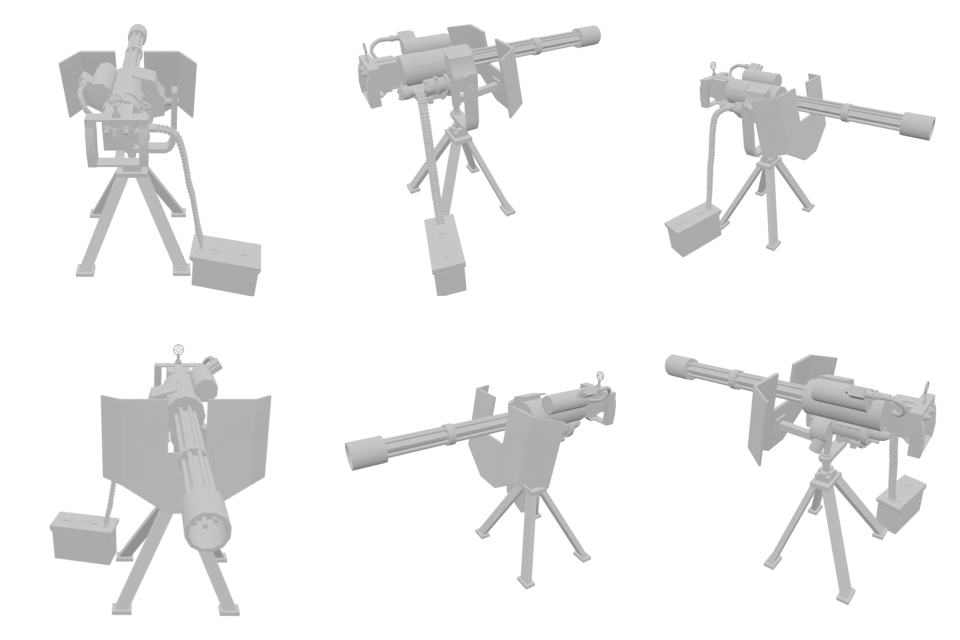

In [28]:
true_images = []
for i in range(0,6):
    image = preprocess(Image.open('test_obj/00' + str(i+2) + '.png'), True)
    width, height = image.size
    white_background = Image.new("RGBA", (width, height), (255, 255, 255, 255))
    white_background.paste(image, (0, 0), image)
    true_images.append(white_background.resize((320, 320)))


combined_image = Image.new("RGB", (mv_show_images.width, mv_show_images.height))
combined_image.paste(mv_show_images, (0,0))

pos_dict = {0:(0,0), 1:(320,0), 2:(640,0), 3:(0,320), 4:(320,320), 5:(640,320)}

combined_images = []
for i in range(0,6):
    print(pos_dict[i])
    combined_image.save(f'changed_obj/00{i}.png')
    combined_images.append(combined_image)
    combined_image.paste(true_images[i], pos_dict[i])

combined_images.append(combined_image)
combined_image.save('changed_obj/006.png')

combined_image

In [8]:
make3d(mv_images)

torch.Size([1, 6, 16]) torch.Size([1, 120, 4, 4])
tensor([[-5.0000e-01, -2.9620e-01,  8.1380e-01,  3.2552e+00,  8.6603e-01,
         -1.7101e-01,  4.6985e-01,  1.8794e+00,  0.0000e+00,  9.3969e-01,
          3.4202e-01,  1.3681e+00,  1.8660e+00,  1.8660e+00,  5.0000e-01,
          5.0000e-01],
        [-1.0000e+00,  1.0633e-17,  6.0302e-17,  2.4121e-16,  6.1232e-17,
          1.7365e-01,  9.8481e-01,  3.9392e+00,  0.0000e+00,  9.8481e-01,
         -1.7365e-01, -6.9459e-01,  1.8660e+00,  1.8660e+00,  5.0000e-01,
          5.0000e-01],
        [-5.0000e-01,  2.9620e-01, -8.1380e-01, -3.2552e+00, -8.6603e-01,
         -1.7101e-01,  4.6985e-01,  1.8794e+00,  0.0000e+00,  9.3969e-01,
          3.4202e-01,  1.3681e+00,  1.8660e+00,  1.8660e+00,  5.0000e-01,
          5.0000e-01],
        [ 5.0000e-01, -1.5038e-01, -8.5287e-01, -3.4115e+00, -8.6603e-01,
         -8.6824e-02, -4.9240e-01, -1.9696e+00,  0.0000e+00,  9.8481e-01,
         -1.7365e-01, -6.9459e-01,  1.8660e+00,  1.8660e+00,  5.000

  0%|          | 0/6 [00:04<?, ?it/s]


KeyboardInterrupt: 